In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from distfit import distfit

In [9]:
def read_files():
    # Ask which files to read
    all_files = input("Do you want to read all files (y/n)?")

    # Read files to dictionary
    data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
    data_dict = {}
    trackMeta_dict = {}
    recordMeta_dict = {}

    if all_files == "y":
        n_files = 60
        for i in range(n_files):
            print(f"reading file {i+1}/{n_files}...\r", end="")
            file_name = f"{i+1:02d}_tracks.csv"
            file_path = os.path.join(data_path, file_name)
            data_dict[f"data_{i+1}"] = pd.read_csv(file_path)

            file_name2 = f"{i+1:02d}_tracksMeta.csv"
            file_path2 = os.path.join(data_path, file_name2)
            trackMeta_dict[f"data_{i+1}"] = pd.read_csv(file_path2)

            file_name3 = f"{i+1:02d}_recordingMeta.csv"
            file_path3 = os.path.join(data_path, file_name3)
            recordMeta_dict[f"data_{i+1}"] = pd.read_csv(file_path3)
        
        return list(range(1,n_files+1)), data_dict, trackMeta_dict, recordMeta_dict

    elif all_files == "n":
        file_numbers_input = input("What file numbers do you want to read? Give numbers separated by commas.")
        file_numbers_list = [int(i) for i in str.split(file_numbers_input, ',')]
        j=1
        for i in file_numbers_list:
            print(f"reading file {j}/{len(file_numbers_list)} ({i})...\r", end="")
            file_name = f"{i:02d}_tracks.csv"
            file_path = os.path.join(data_path, file_name)
            data_dict[f"data_{i}"] = pd.read_csv(file_path)

            file_name2 = f"{i:02d}_tracksMeta.csv"
            file_path2 = os.path.join(data_path, file_name2)
            trackMeta_dict[f"data_{i}"] = pd.read_csv(file_path2)

            file_name3 = f"{i:02d}_recordingMeta.csv"
            file_path3 = os.path.join(data_path, file_name3)
            recordMeta_dict[f"data_{i}"] = pd.read_csv(file_path3)

            j+=1
        return file_numbers_list, data_dict, trackMeta_dict, recordMeta_dict
            
    else:
        print('''The input was not valid. Please enter "y" or "n".''')

In [10]:
# Read the datasets into a "data_dict", "tracksMeta_dict" and "recordMeta_dict" dictionary. 
file_numbers, data_dict, trackMeta_dict, recordMeta_dict = read_files()

In [13]:
if len(file_numbers)==1:
    num = file_numbers[0]
else:
    num = input(f"Which file number do you want to calculate the parameters for? {file_numbers}")

In [14]:
data_dict[f"data_{num}"]

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,1,1,362.26,21.68,4.85,2.12,40.85,0.00,0.30,0.00,...,0.00,0,3,0,0,0,0,0,6,5
1,2,1,363.73,21.68,4.85,2.12,40.87,0.00,0.30,0.00,...,0.00,0,14,0,0,0,0,0,6,5
2,3,1,365.27,21.68,4.85,2.12,40.88,0.00,0.31,0.00,...,0.00,0,14,0,0,0,0,0,6,5
3,4,1,366.83,21.68,4.85,2.12,40.89,0.00,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
4,5,1,368.42,21.68,4.85,2.12,40.90,0.01,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348745,22535,1047,366.97,12.54,6.37,3.13,-35.63,0.19,-0.74,0.11,...,-34.18,1045,0,0,0,0,1039,0,0,3
348746,22536,1047,365.55,12.55,6.37,3.13,-35.66,0.20,-0.74,0.11,...,-34.19,1045,0,0,0,0,1039,0,0,3
348747,22537,1047,364.12,12.56,6.37,3.13,-35.69,0.20,-0.74,0.11,...,-34.19,1045,0,0,0,0,1039,0,0,3
348748,22538,1047,362.69,12.57,6.37,3.13,-35.72,0.21,-0.74,0.11,...,-34.20,1045,0,0,0,0,1039,0,0,3


In [15]:
trackMeta_dict[f"data_{num}"]

,id,width,height,initialFrame,finalFrame,numFrames,class,drivingDirection,traveledDistance,minXVelocity,maxXVelocity,meanXVelocity,minDHW,minTHW,minTTC,numLaneChanges
0,1,4.85,2.12,1,33,33,Car,2,52.25,40.85,41.30,41.07,-1.00,-1.00,-1.00,0
1,2,4.24,1.92,1,130,130,Car,1,167.44,32.04,32.90,32.48,112.62,3.51,-1.00,0
2,3,3.94,1.92,1,157,157,Car,2,225.23,35.69,36.50,36.13,90.31,2.53,-1.00,0
3,4,5.05,2.22,1,161,161,Car,1,273.49,42.57,42.83,42.76,-1.00,-1.00,-1.00,0
4,5,4.24,1.82,1,182,182,Car,1,313.92,42.50,44.26,43.40,33.64,0.76,24.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1043,7.38,2.53,22376,22539,164,Car,1,209.80,31.28,33.26,32.21,16.46,0.52,-1.00,0
1043,1044,5.15,2.02,22383,22538,156,Car,2,233.81,37.03,39.03,37.75,63.66,1.68,45.59,0
1044,1045,4.75,2.02,22456,22539,84,Car,1,112.72,33.95,34.21,34.01,91.27,2.67,52.71,0
1045,1046,4.35,2.12,22456,22531,76,Car,1,89.72,29.44,30.58,29.96,118.38,4.02,19.11,0


In [16]:
recordMeta_dict[f"data_{num}"]

,id,frameRate,locationId,speedLimit,month,weekDay,startTime,duration,totalDrivenDistance,totalDrivenTime,numVehicles,numCars,numTrucks,upperLaneMarkings,lowerLaneMarkings
0,1,25,2,-1.0,9.2017,Tue,08:38,901.56,418549.19,13908.12,1047,863,184,8.51;12.59;16.43,21.00;24.96;28.80


# 1.TTC

In [29]:
data = data_dict[f"data_{num}"]["ttc"]
model = distfit()
model.fit_transform(data)
model.plot()
plt.xlabel("TTC (sec)")
plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform


MemoryError: Unable to allocate 657. MiB for an array with shape (86112600,) and data type int64

# 2. Speed

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.06 sec] [RSS: 0.00376954] [loc=108.402 scale=20.450]
[distfit] >INFO> [expon     ] [0.01 sec] [RSS: 0.00680271] [loc=72.468 scale=35.934]
[distfit] >INFO> [pareto    ] [27.7 sec] [RSS: 0.00933898] [loc=-0.209 scale=72.677]
[distfit] >INFO> [dweibull  ] [13.2 sec] [RSS: 0.00351696] [loc=105.571 scale=19.141]
[distfit] >INFO> [t         ] [21.5 sec] [RSS: 0.0037697] [loc=108.402 scale=20.449]
[distfit] >INFO> [genextreme] [33.6 sec] [RSS: 0.0039715] [loc=99.857 scale=18.338]
[distfit] >INFO> [gamma     ] [16.2 sec] [RSS: 0.00385233] [loc=71.426 scale=13.755]
[distfit] >INFO> [lognorm   ] [31.2 sec] [RSS: 0.0041013] [loc=33.995 scale=71.599]
[distfit] >INFO> [beta      ] [18.9 sec] [RSS: 0.00308801] [loc=72.463 scale=112.048]
[distfit] >INFO> [uniform   ] [0.01 sec] [RSS: 0.00748582] [loc=72.468 scale=108.468]
[distfit] >INFO> [loggamma  ] [35.4 sec] [RSS: 0.00371406] [loc=-5868.796 scale=814.502]
[distfit] >

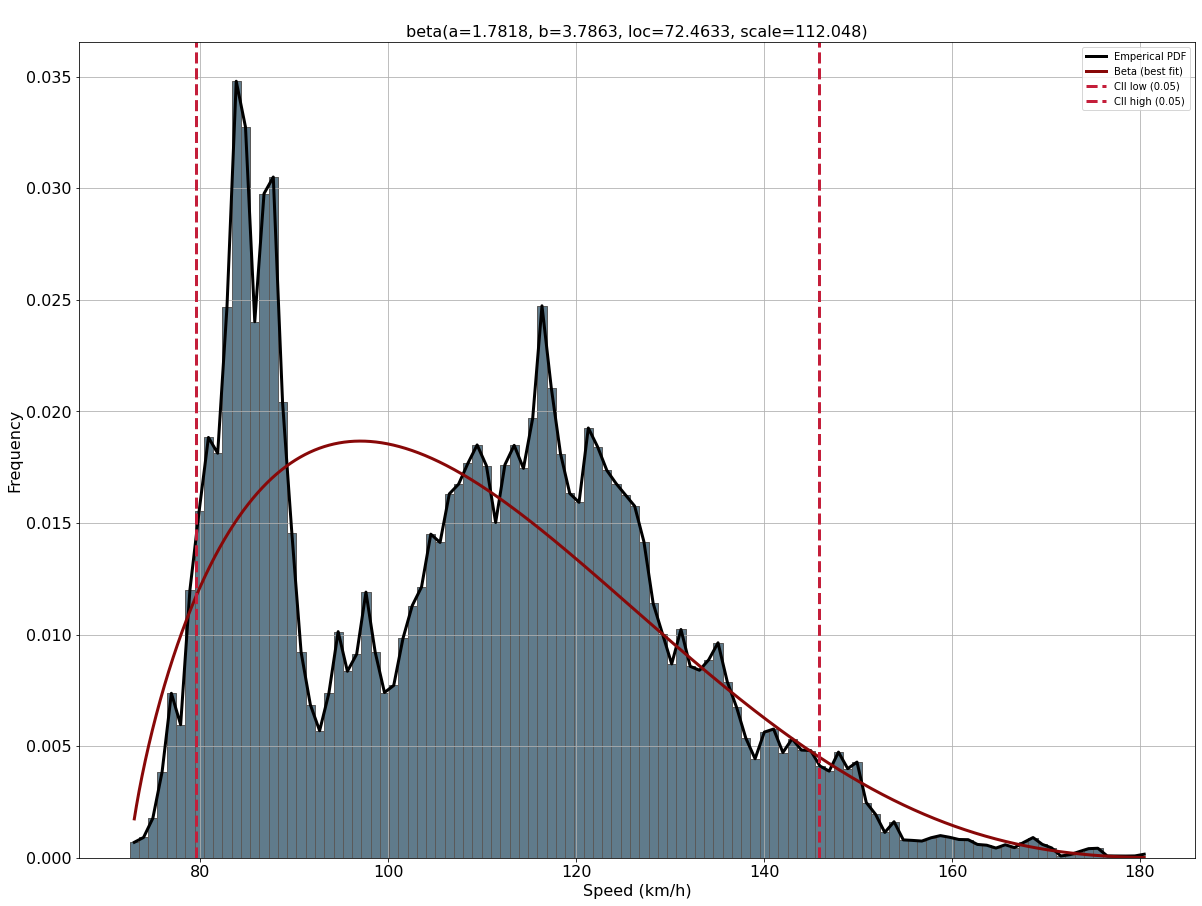

In [ ]:
data = np.sqrt(data_dict[f"data_{num}"]["xVelocity"]**2 + data_dict[f"data_{num}"]["yVelocity"]**2) * 3600 / 1000
model = distfit()
model.fit_transform(data)
model.plot()
plt.xlabel("Speed (km/h)")
plt.show()


# 3. DRAC

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.03 sec] [RSS: 4935.62] [loc=0.181 scale=0.463]
[distfit] >INFO> [expon     ] [0.01 sec] [RSS: 3981.68] [loc=0.000 scale=0.181]
[distfit] >INFO> [pareto    ] [38.7 sec] [RSS: 207.41] [loc=-0.005 scale=0.005]
[distfit] >INFO> [dweibull  ] [29.0 sec] [RSS: 3216.18] [loc=0.000 scale=0.182]
[distfit] >INFO> [t         ] [10.2 sec] [RSS: 1436.7] [loc=0.004 scale=0.007]
[distfit] >INFO> [genextreme] [44.9 sec] [RSS: 51.7957] [loc=0.006 scale=0.015]
[distfit] >INFO> [gamma     ] [21.7 sec] [RSS: 1461] [loc=-0.000 scale=1.538]
[distfit] >INFO> [lognorm   ] [21.9 sec] [RSS: 184.469] [loc=-0.000 scale=0.018]
[distfit] >INFO> [beta      ] [39.3 sec] [RSS: 1317.69] [loc=-0.000 scale=23.074]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5182.34] [loc=0.000 scale=12.448]
[distfit] >INFO> [loggamma  ] [12.9 sec] [RSS: 5142.66] [loc=1.540 scale=1.648]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >I

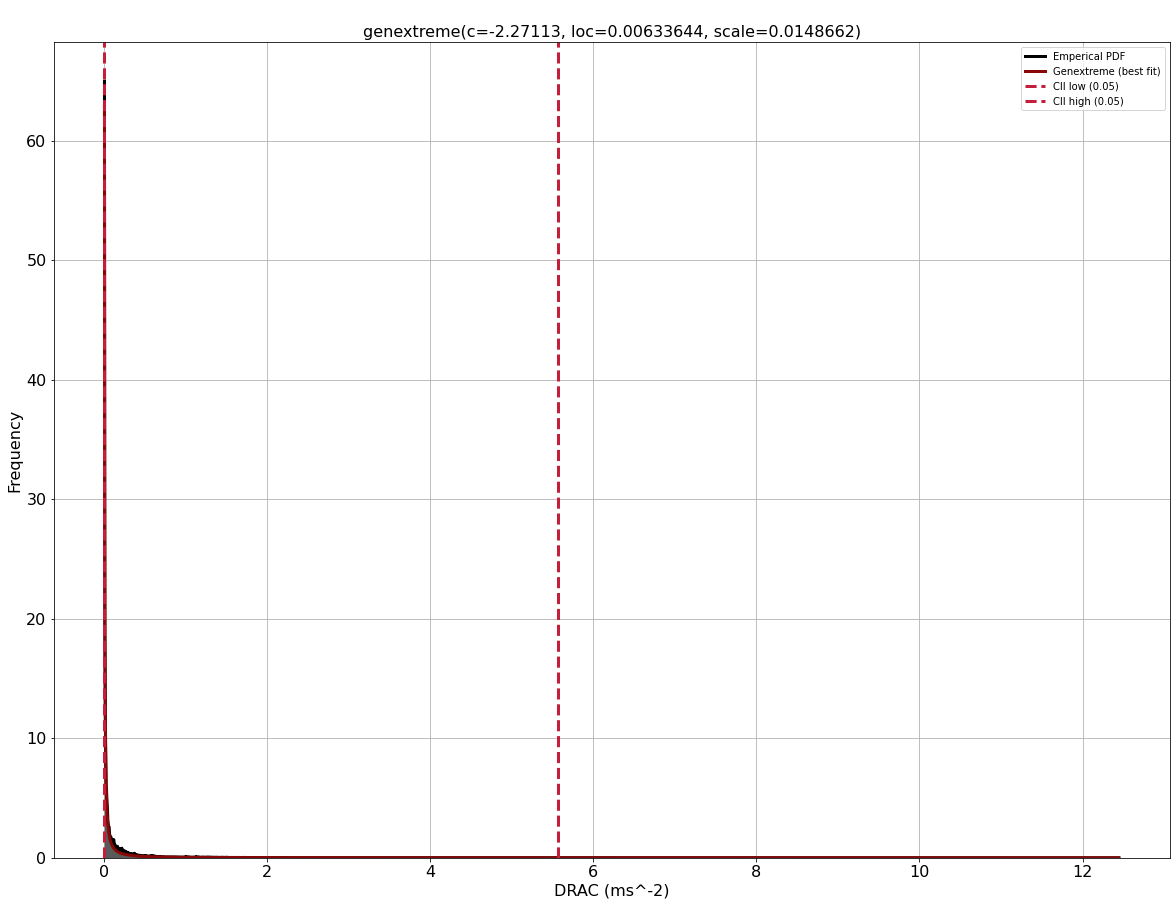

In [ ]:
data_dict[f"data_{num}"]["DRAC"] = (data_dict[f"data_{num}"]["precedingXVelocity"] - data_dict[f"data_{num}"]["xVelocity"])**2 / data_dict[f"data_{num}"]["dhw"]
data_dict[f"data_{num}"]["DRAC"].replace([np.inf, -np.inf], np.nan, inplace=True)
DRAC = data_dict[f"data_{num}"]["DRAC"]
model = distfit()
model.fit_transform(DRAC.dropna())
model.plot()
plt.xlabel("DRAC (ms^-2)")
plt.show()


In [ ]:
frameRate = 25
frameTime = 1/frameRate

# modifiable parameters:
# size_of_bins          Number of frames per bin
# length_of_road        The length of the road on which the density is computed
# dataset               Which dataset is used to compute
size_of_bins = 2400
length_of_road = 410

# for i in range(n_files):
frames = trackMeta_dict[f"data_{num}"]["drivingDirection"].shape[0]
n_bins = trackMeta_dict[f"data_{num}"]["finalFrame"][frames-1]//size_of_bins+1

# initialization of bins for each direction
bins_1 = [0]*(n_bins)
bins_2 = [0]*(n_bins)

for j in range(frames):
    # we compute the floor of the initial and final frame for each vehicle
    initial = trackMeta_dict[f"data_{num}"]["initialFrame"][j]//size_of_bins
    final = trackMeta_dict[f"data_{num}"]["finalFrame"][j]//size_of_bins

    if(trackMeta_dict[f"data_{num}"]["drivingDirection"][j] == 1):
        # we increment the bin where the vehicle is in 
        for k in range(initial, final+1):
            bins_1[k] += 1
    else:
        # we increment the bin where the vehicle is in 
        for k in range(initial, final+1):
            bins_2[k] += 1

density_1 = np.array(bins_1)/length_of_road
density_2 = np.array(bins_2)/length_of_road

# we gather the relevant statistics for the density at each side of the road
density_mean_1 = np.mean(density_1)
density_std_1 = np.std(density_1)

density_mean_2 = np.mean(density_2)
density_std_2 = np.std(density_2)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 149.866] [loc=0.163 scale=0.039]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 293.533] [loc=0.076 scale=0.088]
[distfit] >INFO> [pareto    ] [0.11 sec] [RSS: 317.077] [loc=-0.054 scale=0.130]
[distfit] >INFO> [dweibull  ] [0.11 sec] [RSS: 122.589] [loc=0.159 scale=0.029]
[distfit] >INFO> [t         ] [0.22 sec] [RSS: 159.691] [loc=0.165 scale=0.029]
[distfit] >INFO> [genextreme] [0.18 sec] [RSS: 159.062] [loc=0.155 scale=0.043]
[distfit] >INFO> [gamma     ] [0.24 sec] [RSS: 149.688] [loc=-0.441 scale=0.003]
[distfit] >INFO> [lognorm   ] [0.47 sec] [RSS: 149.725] [loc=-10.441 scale=10.604]
[distfit] >INFO> [beta      ] [0.32 sec] [RSS: 165.854] [loc=0.067 scale=0.155]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 186.778] [loc=0.076 scale=0.146]
[distfit] >INFO> [loggamma  ] [0.07 sec] [RSS: 164.584] [loc=0.126 scale=0.054]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit

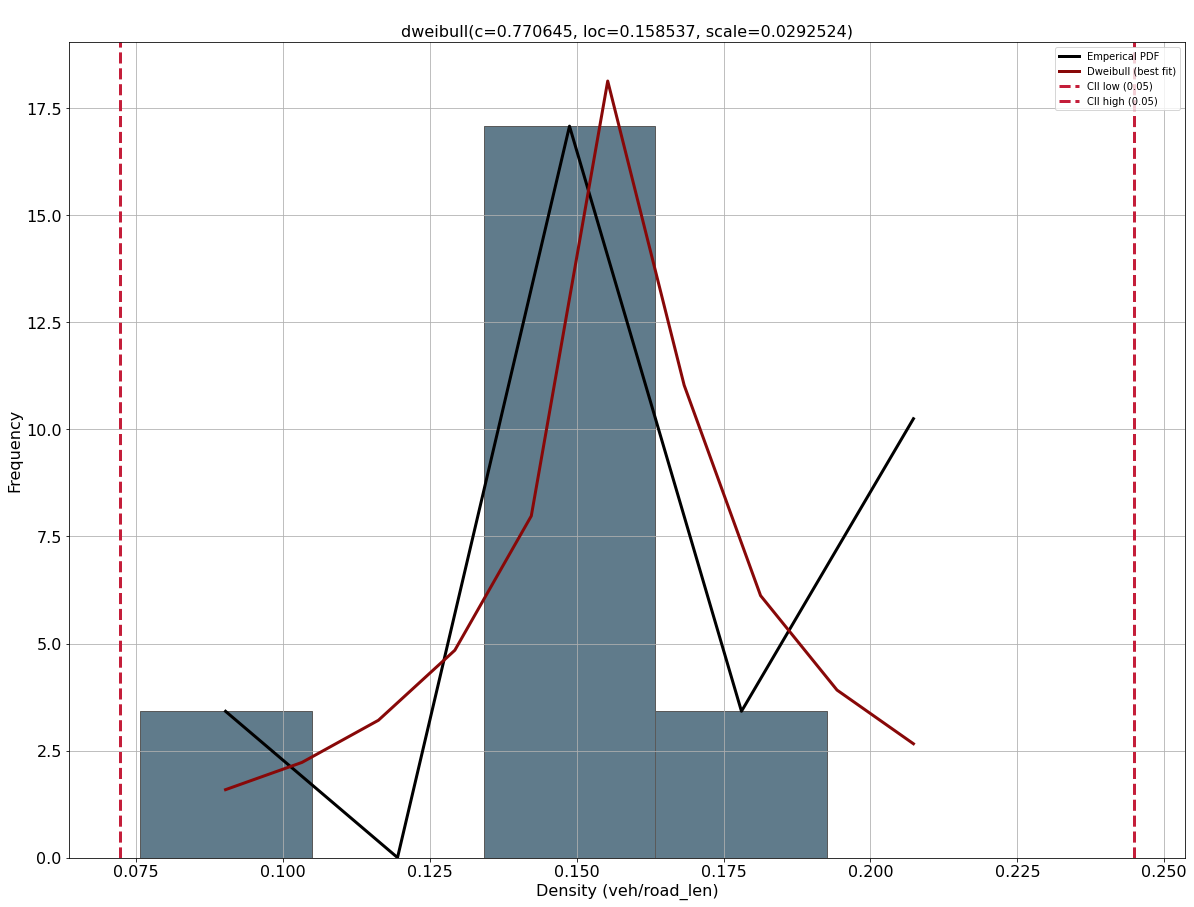

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1162.75] [loc=0.123 scale=0.023]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1735.93] [loc=0.063 scale=0.060]
[distfit] >INFO> [pareto    ] [0.19 sec] [RSS: 1812.49] [loc=-0.126 scale=0.190]
[distfit] >INFO> [dweibull  ] [0.14 sec] [RSS: 166.102] [loc=0.137 scale=0.019]
[distfit] >INFO> [t         ] [0.24 sec] [RSS: 931.623] [loc=0.131 scale=0.020]
[distfit] >INFO> [genextreme] [0.73 sec] [RSS: 399.103] [loc=0.123 scale=0.023]
[distfit] >INFO> [gamma     ] [0.22 sec] [RSS: 1846.46] [loc=0.063 scale=1.149]
[distfit] >INFO> [lognorm   ] [0.37 sec] [RSS: 1171.67] [loc=-9.324 scale=9.447]
[distfit] >INFO> [beta      ] [0.20 sec] [RSS: 854.239] [loc=0.058 scale=0.086]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1312.08] [loc=0.063 scale=0.080]
[distfit] >INFO> [loggamma  ] [0.11 sec] [RSS: 404.739] [loc=0.144 scale=0.000]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >

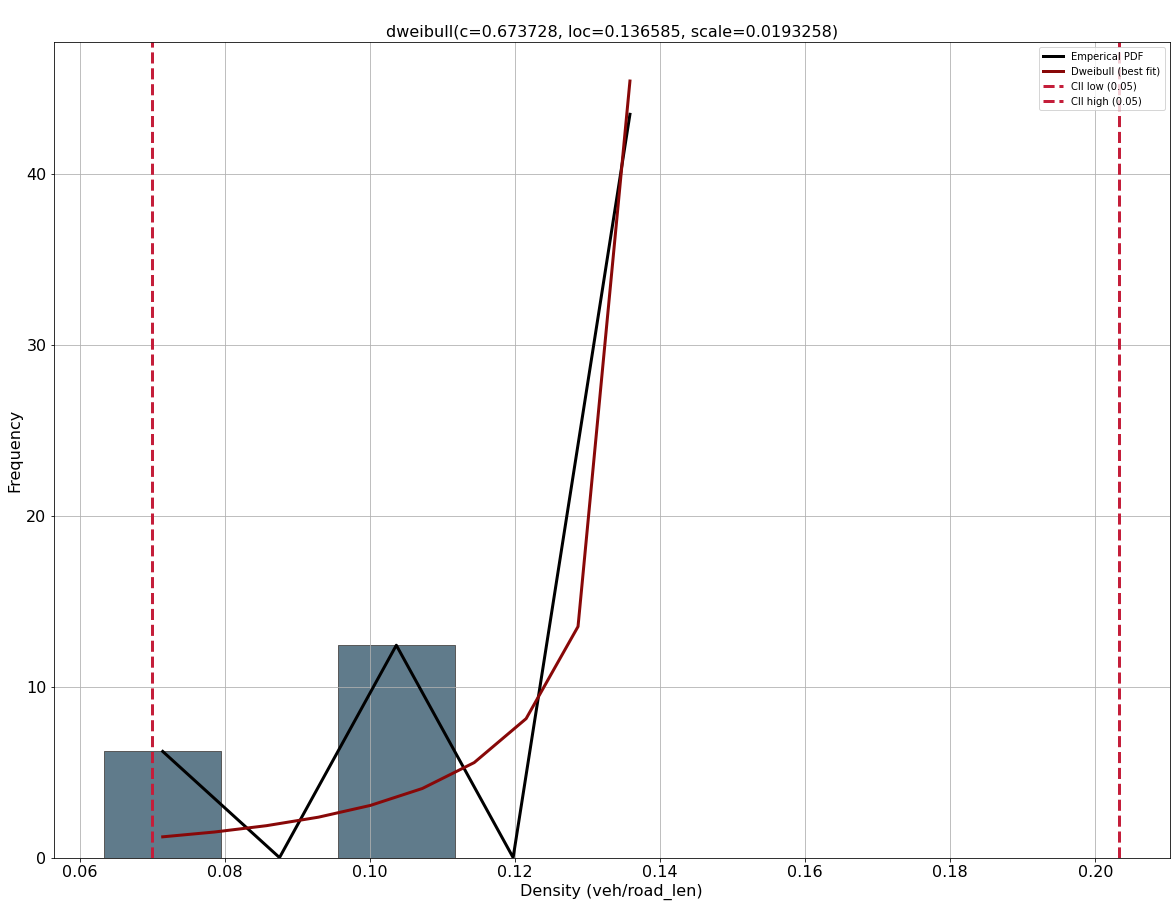

In [ ]:
# Find the best distribution for density_1
distfit_density_1 = distfit()
distfit_density_1.fit_transform(density_1)
distfit_density_1.plot()
plt.xlabel("Density (veh/road_len)")
plt.show()

# Find the best distribution for density_2
distfit_density_2 = distfit()
distfit_density_2.fit_transform(density_2)
distfit_density_2.plot()
plt.xlabel("Density (veh/road_len)")
plt.show()

In [ ]:
cs_pos = 200
frame_rate = 25
time = np.ceil(recordMeta_dict[f"data_{num}"]["duration"]).astype("int")
frame = data_dict[f"data_{num}"]["frame"]
x_pos = data_dict[f"data_{num}"]["x"]
width = data_dict[f"data_{num}"]["width"]
num_data = len(frame)
num_vehicle = np.zeros(time)

for i in range(num_data):
    if x_pos[i]>=cs_pos-(width[i]/2) and x_pos[i]<=cs_pos+(width[i]/2):
        j = frame[i] // frame_rate
        num_vehicle[j] += 1

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0344628] [loc=6.436 scale=6.422]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0181003] [loc=0.000 scale=6.436]
[distfit] >INFO> [pareto    ] [0.17 sec] [RSS: 0.030384] [loc=-1.679 scale=1.679]
[distfit] >INFO> [dweibull  ] [0.08 sec] [RSS: 0.0302365] [loc=5.429 scale=5.102]
[distfit] >INFO> [t         ] [0.27 sec] [RSS: 0.0286754] [loc=4.842 scale=4.369]
[distfit] >INFO> [genextreme] [0.28 sec] [RSS: 0.0208138] [loc=2.858 scale=3.477]
[distfit] >INFO> [gamma     ] [0.32 sec] [RSS: 0.0219314] [loc=-0.000 scale=5.210]
[distfit] >INFO> [lognorm   ] [0.55 sec] [RSS: 0.0554895] [loc=-0.000 scale=6.221]
[distfit] >INFO> [beta      ] [0.59 sec] [RSS: 0.0194342] [loc=-0.000 scale=60.628]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0552894] [loc=0.000 scale=44.000]
[distfit] >INFO> [loggamma  ] [0.29 sec] [RSS: 0.0345454] [loc=-1708.552 scale=238.283]
[distfit] >INFO> Compute confidence int

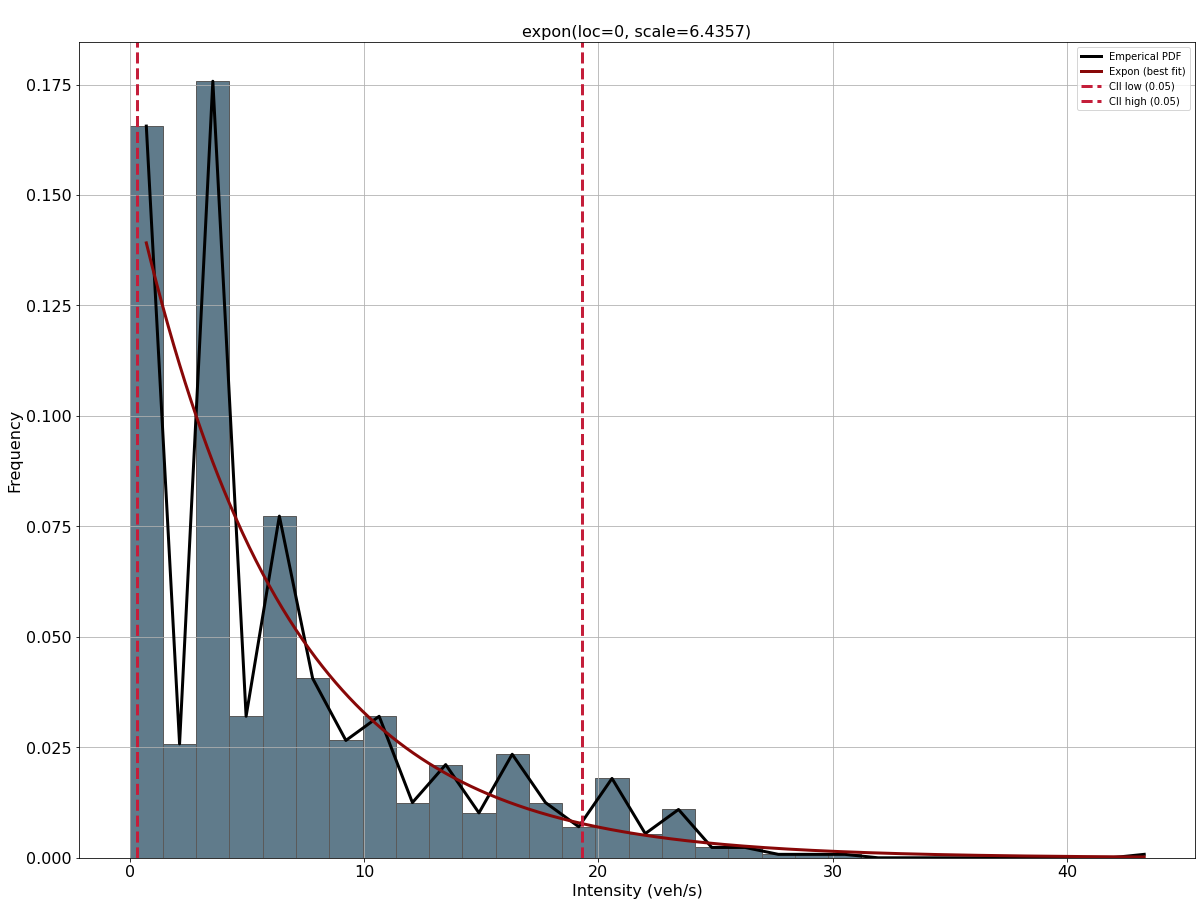

In [ ]:
# Find the best distribution for num_vehicle
distfit_num_vehicle = distfit()
distfit_num_vehicle.fit_transform(num_vehicle)
distfit_num_vehicle.plot()
plt.xlabel("Intensity (veh/s)")
plt.show()
